# Project 4 Team Luther Tweeten

Hi! We are Team Luther Tweeten (Jana Ariss, Jerry Jiao, Brian So, Steffany Wong, Sean Kim, Yinan Xia, and Nick Everest). Our project focuses on the Nigerian food system and its correlating nutritional context. We hope to understand the background of Nigeria's food ways in addition to estimating their food demand and constructing a nutritional system. Then we will apply certain policy proposals to address nutritional deficiences in the region.

## Deliverable [A] Estimate Demand System

We will first begin with estimating Nigeria's demand system. This begins with the installing all requirements and importing necessary packages.

In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installatio

In [2]:
import cfe

cfe.Result?

Missing dependencies for OracleDemands.


Now we can load in the Nigeria dataset provided by our professor!

In [10]:
r = cfe.from_dataset('./Nigeria_small.ds',engine='netcdf4')

r

<xarray.Result>
Dimensions:           (i: 124, k: 14, t: 4, m: 1, u: 21, j: 8522, kp: 14)
Coordinates:
  * i                 (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
  * k                 (k) object 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
  * t                 (t) int64 2010 2012 2015 2018
  * m                 (m) int64 1
  * u                 (u) object '1. KILOGRAMS (KG)' ... 'litre (l)'
  * j                 (j) object '100001' '100002' '100003' ... '99096' '99098'
  * kp                (kp) object 'F 0-3' 'F 14-18' ... 'M 51+' 'M 9-13'
Data variables: (12/20)
    alpha             (i) float64 4.138 4.828 nan nan ... 5.031 nan nan 5.717
    beta              (i) float64 0.2647 0.4927 nan nan ... 0.3716 nan nan 0.31
    delta             (k, i) float64 -0.01694 0.03455 nan ... nan nan 0.08949
    prices            (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 nan ... nan nan nan 1.0
    loglambdas        (j, t, m) float64 nan nan 0.3517 nan ... nan nan 0.9968
    ...                ...
    se_beta           float64 nan
    se_alpha          (i) float64 0.05958 0.046 0.0 0.0 ... 0.0 0.0 0.02184
    se_a              (i, t, m) float64 0.05958 0.05604 ... 0.02325 0.0213
    y                 object None
    logp              (t, m, i, u) float64 nan nan nan nan ... nan nan nan nan
    z                 (k, j, t, m) float64 0.0 0.0 0.0 nan ... nan nan nan 1.0
Attributes:
    firstround:            2010
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  None
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

To make things more readable, we will consolidate the units.

In [12]:
r.u

<xarray.DataArray 'u' (u: 21)>
array(['1. KILOGRAMS (KG)', '2. GRAMS (G)', '2. GRAMS (GR)', '3. LITRES (L)',
       '4. CENTILITRES (CL)', 'Basin: Big/Large (40 kg)',
       'Basin: Medium (25 kg)', 'Basin: Small (10 kg)',
       'Basket: Medium (30 kg)', 'Basket: Small (15 kg)',
       'Bunch of Plantain/FFB: Small (5 kg)',
       'Bunch of plantain/FFB: Big (15 kg)',
       'Bunch of plantain/FFB: Medium (8 kg)', 'Grams', 'Kilograms', 'Litres',
       'Mililitre', 'centilitre (cl)', 'grams (g)', 'kilogram (kg)',
       'litre (l)'], dtype=object)
Coordinates:
  * u        (u) object '1. KILOGRAMS (KG)' '2. GRAMS (G)' ... 'litre (l)'

In [13]:
r.prices = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sum('u')

In [15]:
#r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sel(i='Milk powder').to_dataframe('u')

In [16]:
r.get_predicted_expenditures(as_df=True)['Milk powder']

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


j       t     m
100001  2015  1    152.220375
100002  2012  1    276.705041
        2015  1    414.680511
100003  2010  1    377.241762
        2012  1    519.330083
                      ...    
99077   2018  1    155.936920
99079   2018  1    217.469558
99088   2018  1     72.283421
99096   2018  1    229.988649
99098   2018  1    100.220712
Name: Milk powder, Length: 6432, dtype: float64

In [17]:
r.get_alpha(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 4.137737
Agricultural eggs                       4.828057
Bananas                                 4.752126
Beef                                    6.097617
Beer (local and imported)               5.850864
Bread                                   5.065000
Brown beans                             5.226534
Chicken                                 6.381765
Chocolate drinks                        5.264990
Cocoyam                                 4.954118
Condiments,(salt,spices,pepper, etc)    3.358059
Fish-Dried                              5.577516
Fish-Fresh                              6.208897
Fish-Frozen                             5.722683
Fish-Smoked                             5.389794
Garden eggs/egg plant                   4.155502
Gari -Yellow                            5.333468
Gari-White                              5.244837
Goat                                    6.398805
Groundnut oil                           5.270093
Malt drinks       

In [18]:
r.get_beta(as_df=True).dropna()

i
(Cocoyam, Spinach, etc)                 0.264663
Agricultural eggs                       0.492709
Bananas                                 0.334000
Beef                                    0.315412
Beer (local and imported)               0.327214
Bread                                   0.346662
Brown beans                             0.316207
Chicken                                 0.276107
Chocolate drinks                        0.541461
Cocoyam                                 0.241237
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Fish-Fresh                              0.386942
Fish-Frozen                             0.226933
Fish-Smoked                             0.354824
Garden eggs/egg plant                   0.240667
Gari -Yellow                            0.272450
Gari-White                              0.316419
Goat                                    0.282581
Groundnut oil                           0.344536
Malt drinks       

In [19]:
from cfe.df_utils import to_dataframe
to_dataframe(r.delta).unstack("k")

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.016940,0.045847,-0.005505,-0.017215,0.032895,0.033067,0.141298,-0.023781,0.015007,0.021452,0.027689,0.094989,0.110343,0.048901
Agricultural eggs,0.034552,0.096835,0.018018,0.053636,0.084221,0.209310,0.214793,0.042721,0.048441,0.020054,0.048770,0.098147,0.148663,0.048849
Bananas,0.087191,0.014969,0.041125,0.074841,0.056436,0.097571,0.099270,0.024251,-0.010054,0.036853,0.035830,0.071993,0.100703,0.006572
Beef,0.031357,0.040075,0.022819,0.067268,0.088596,0.156118,0.157754,0.006855,0.028480,0.044742,0.067865,0.088548,0.103018,0.027693
Beer (local and imported),0.010837,0.067073,-0.007325,-0.037233,0.090008,0.113648,0.053466,0.046941,0.034432,-0.008684,0.016815,0.016893,0.080541,0.021043
Bread,0.003213,0.077405,0.035565,0.076229,0.082149,0.148911,0.175974,0.023225,0.046668,0.060806,0.080997,0.096974,0.099630,0.013089
Brown beans,0.042174,0.095950,0.089248,0.078895,0.055726,0.129848,0.138940,0.028881,0.029328,0.067292,0.081007,0.078684,0.109293,0.083297
Chicken,-0.065475,0.076064,-0.048039,-0.016739,0.046631,0.095953,0.194257,-0.071763,0.001326,0.006518,-0.004462,0.060025,0.195275,0.091070
Chocolate drinks,0.084639,0.007797,0.027564,0.063775,0.063896,0.164630,0.167554,0.070132,0.027591,0.011240,0.092243,0.165170,0.115693,0.035243


The triple of parameters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



Now that we have simplified and cleaned the dataset, we can begin to comput Marchallian demands as done in lecture.



In [21]:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

# Note selection of prices for 1975 for market A
p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()
# p = p.drop("u")
p

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


<xarray.DataArray 'prices' (i: 103)>
array([ 68.315621, 202.653897,   0.      ,  72.225457, 231.375755,
        90.821855, 461.599232,  38.754296,   0.      , 102.388627,
       142.080756, 130.242559, 128.150683,  43.036814,  45.883362,
       440.628414,  30.104512,  34.444198,   0.      , 513.588919,
       674.060828,  62.384184, 653.846154,   2.570305,   0.      ,
       310.97038 , 252.308978, 293.192625, 298.477485,   0.762623,
       162.085961,   0.      , 103.251146,  58.165672,  92.222754,
        58.032733, 486.575342, 399.886122,   0.      , 221.239344,
        71.148007,  53.732298, 175.73441 , 201.940242,  75.165792,
        60.508915,   0.      ,  95.230839,  97.776685,  52.395501,
         0.      ,   0.      , 355.316887, 137.791363,  49.858175,
        54.983398,   0.      , 140.781098, 100.610711,   3.288411,
        70.874965, 226.201673, 104.607811, 174.485676, 349.958089,
       365.171249,  83.55461 ,  66.298087, 121.676609, 376.543771,
       171.135171, 159.940677, 104.25101 , 214.129725, 127.165962,
        25.777035, 222.521857,   0.      , 150.728058,  93.979817,
       108.477559, 117.070492, 349.149603,  81.496036, 167.48104 ,
       106.867644,   8.092877,   0.      , 313.029678,  65.957146,
        87.464554,  96.292608,   1.527715, 112.26298 , 172.949669,
        58.928495,  14.966415,   0.      ,  98.954978, 101.311511,
       426.200899, 225.491453,  61.296256])
Coordinates:
  * i        (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'
    t        int64 2010
    m        int64 1

Now compute expenditures on different items.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [22]:
c=r.demands(median_x,p)
c

i
(Cocoyam, Spinach, etc)                  1.683836
Agricultural eggs                        2.169352
Bananas                                  2.154764
Beef                                     1.889941
Beer (local and imported)                4.015982
Bread                                    2.117247
Brown beans                              2.144282
Chicken                                  1.833468
Chocolate drinks                         1.547901
Cocoyam                                  2.001316
Condiments,(salt,spices,pepper, etc)     6.384233
Fish-Dried                               2.334321
Fish-Fresh                               2.717149
Fish-Frozen                              1.602941
Fish-Smoked                             15.453283
Garden eggs/egg plant                    1.676680
Gari -Yellow                             2.182408
Gari-White                               2.786807
Goat                                     2.005620
Groundnut oil                            1.94177

Now we can trace out demands for a household with median budget but
varying prices of (say) coconuts (holding other prices fixed):



No handles with labels found to put in legend.


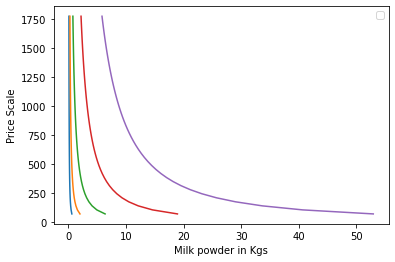

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'Milk powder'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel("%s in Kgs" % USE_GOOD)
plt.ylabel('Price Scale')
plt.legend()

Engel curve: response of expenditure on target good as budget increases

Text(0.5, 0, 'Budget')

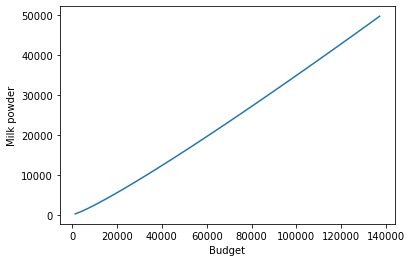

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# USE_GOOD = 'Wheat'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)

# Range of budgets to consider
X = np.linspace(median_x/10,median_x*10,50)

plt.plot(X,[r.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')

## Deliverable [A] Construct Nutrient System

We can begin with our second project goal to detail Nigeria's nutrient system given food demand.

This needs the food data from project 2 to run (ie the data folder in project 2).

In [2]:
!pip uninstall cfe
!pip install -r requirements.txt

In [3]:
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#r = cfe.result.from_dataset('Indian ICRISAT_small.ds',engine='netcdf4')
r = cfe.result.from_dataset('Nigeria_small.ds',engine = 'netcdf4')
UseNutrients=['Protein','Calories','Iron']

# Reference period, market
#t,m = 75,1
t,m = 2010,1

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

Missing dependencies for OracleDemands.


/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


i                        u                    
(Cocoyam, Spinach, etc)  Basket: Small (15 kg)    2121.212121
                         Grams                       0.139593
                         Kilograms                  68.315621
Agricultural eggs        Basin: Small (10 kg)       25.161967
                         Basket: Small (15 kg)      27.268338
                                                     ...     
Yam flour                Kilograms                 225.491453
Yam-roots                Basin: Small (10 kg)      435.393258
                         Basket: Small (15 kg)     304.000000
                         Grams                       0.098436
                         Kilograms                  61.296256
Name: i, Length: 297, dtype: float64

This first round, averaged over households and villages.

In [4]:
zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()

We need diet minimums for project2 to run.

In [5]:
bmin = pd.read_csv('./diet_minimums (1).csv').set_index('Nutrition').iloc[:,2:]
bmin['M 0-3'] = bmin['C 1-3']
bmin['F 0-3'] = bmin['C 1-3']
bmin = bmin.drop(columns = ['C 1-3'])
bmin

FileNotFoundError: [Errno 2] No such file or directory: './diet_minimums (1).csv'

In [ ]:
#rda = pd.read_pickle('indian_rda.df').T
rda = bmin
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household in 1975
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in ICRISAT data are /annual/:
hh_rda = hh_rda*7

Now we can produce the household weekly recommended nutrient intake.

In [6]:
hh_rda

NameError: name 'hh_rda' is not defined

from eep153_tools.sheets import read_sheets
DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
fct = read_sheets(DataURL)
Nigeria_nutrition = fct['Codes'][['Food description','USDA FDC ID']].rename(columns = {'Food description':'Food','USDA FDC ID':'FDC'})
Nigeria_nutrition

In [ ]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

We now fill in FDC codes that were outdated in the list we were given.

In [ ]:
Nigeria_nutrition = Nigeria_nutrition.set_index('Food')
Nigeria_nutrition.loc['Maize'] = 1103351
Nigeria_nutrition.loc['Milk powder'] = 1970648
Nigeria_nutrition.loc['Cassava flour'] = 1955537
Nigeria_nutrition.loc['Butter/Margarine'] = 1956025
Nigeria_nutrition

In [ ]:
Nigeria_nutrition = Nigeria_nutrition.reset_index()
Nigeria_nutrition

Once again we need to make a new fct table for Nigeria.

In [ ]:
#the original class function
import warnings
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf" 
df = Nigeria_nutrition
D = {}
count = 0
for food in  df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

D

In [ ]:
Food = D.T.fillna(0)
Food = Food.reset_index().rename(columns={'index':'i'}).set_index('i')
Food

For Nigeria:

DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
fct = read_sheets(DataURL)
type(fct)
pd.DataFrame(fct,index=[0])

In [8]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [9]:
fct = Food

NameError: name 'Food' is not defined

In [ ]:
fct['Protein'].index

In [ ]:
fct = fct.rename({'Fish--dried':'Fish-Dried','Fish--fresh':'Fish-Fresh','Fish--frozen':'Fish-Frozen','Fish--smoked':'Fish-Smoked',
                 'Rice--imported':'Rice-Imported','Rice--local':'Rice-local'},axis = 'index')
#'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked',

Somehow the above listed labels get messed up in the cfe so need to rename to fix the issue. Then we check to see that the issue is fixed.

In [10]:
fct.index

NameError: name 'fct' is not defined

In [ ]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [ ]:
original_p = p
original_p

In [ ]:
#selecting only units of kilograms
p = p.unstack('u')['Kilograms']

In [ ]:
#all labels in original price vector
len(pd.DataFrame(original_p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

In [ ]:
#all labels in kilogram parsed vector
len(pd.DataFrame(p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

In [ ]:
sum(p.isna())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = ['Protein','Energy','Calcium, Ca','Iron, Fe','Vitamin A, RAE', 'Zinc, Zn']
df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

In [ ]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

Here we figured out the most important sources of protein (also did for various other nutrients!)

In [ ]:
pd.DataFrame(fct['Calcium, Ca'].sort_values(ascending = False).index)

In [ ]:
pd.DataFrame(p.index.values).isin(r.prices.sel(t=t,m=m,drop=True).i.values)

In [ ]:
r.prices.sel(t=t,m=m,drop=True).i.values

In [ ]:
r.prices.sel(t=t,m=m,drop=True).i

In [ ]:
USE_GOOD = 'Milk powder'

ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,drop=True)

P =  np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

In [ ]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [ ]:
hh_rda

In [ ]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [ ]:
USE_GOOD = 'Canned beef/corned beef'

Tracing nutritional adaquacy while changing price of a certain good.

In [ ]:
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,50,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [ ]:
USE_GOOD = 'Fish-Dried'

In [ ]:
#not touching this was for milk powder
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [ ]:
USE_GOOD = 'Milk powder'

In [ ]:
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
UseNutrients = ['Calcium, Ca']
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])
ax.set_title('Effect of Varying Milk Powder Price on Calcium Nutrition')

In [ ]:
!pip install CFEDemands --upgrade --pre
!pip install xarray

In [ ]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)

## Deliverable [C] Value of Technological Innovation

We now move into looking at how the inlcusion of Golden Rice can change the nutrient system in Nigeria.

In [ ]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

In [ ]:
fdc.search(apikey = apikey ,term = 'Golden Rice')
#golden rice doesn't exist so going to manually input the vitamin A

In [ ]:
#their vitamin A is in microgram 
#https://www.sciencedaily.com/releases/2009/05/090513121102.htm#:~:text=Golden%20Rice%20was%20developed%20in,of%20beta%2Dcarotene%20per%20gram. 
#35 micrograms/gram
fct['Vitamin A, RAE']['Rice-local'] = 3500
fct['Vitamin A, RAE']['Rice-Imported'] = 3500
fct['Vitamin A, RAE']

In [ ]:
fct['Vitamin A, RAE']

In [ ]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [ ]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [ ]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [ ]:
fct['Vitamin A, RAE']

In [ ]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [ ]:
r.get_beta(as_df = True).index.to_list()

In [ ]:
#r.get_predicted_expenditures().sel(i='Rice--local')

In [ ]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)
#use this to show can't really find an elastic good that has a lot of calcium

## Deliverabl [C] Policy Cost

We can now estimate the cost of our policy proposal to susidize certain foods that increase nutritional value. For our example, we consider Milk Powder as shown previously.

In [ ]:
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/',
       'Tanzania':'https://docs.google.com/spreadsheets/d/1Tknc2F8K6SaA7j0R7J_NE8yJBTsCPPw77_Bfc04MY40/',
       'Indian ICRISAT':'https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo'}

DAYS_PER_PERIOD = {'Uganda':7,'Nigeria':7,'Indian ICRISAT':365.25} # Number of days of expenditure recall

In [ ]:
COUNTRY = 'Nigeria'

r = cfe.from_dataset("%s_small.ds" % COUNTRY,engine='netcdf4')

We begin by setting up some benchmarks for prices and budgets, so the things we don't want to change we can hold fixed.

In [ ]:
r.prices = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms']).dropna('i',how='all').sum('u')

In [ ]:
r.prices

In [ ]:
import numpy as np

### First year, first market, and some good.  Change if you wish! ###
my_t = r.coords['t'].data.flatten()[0] # Period
my_m = r.coords['m'].data.flatten()[0] # Market
my_i = 'Milk powder' # r.coords['i'].data.flatten()[0] # Good
#####################################################################

# p = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms'],t=my_t,m=my_m,drop=True)
p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna().squeeze()

ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
# ref_price = r.prices.sel(u=['kilogram (kg)','1. KILOGRAMS (KG)','Kilograms'],i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

def my_prices(p0,p=phat,i=my_i):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

# phat.u
phat

We will now change the price to see how things change and we will compare both the Marshallian and Hicksian demands.

In [ ]:
# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')

# Drop households with /no/ predicted expenditures
xbar = xbar.where(xbar>0)

x0 = xbar.quantile(0.5,'j') # Budget (median household)
#x0 = 50

# Range of budgets to explore
X = np.linspace(x0/10,x0*5,50)

In [ ]:
my_prices

In [ ]:
my_prices(P[0],i=my_i)

In [ ]:
import matplotlib.pyplot as plt

U0 = r.indirect_utility(x0,p)

plt.plot([r.demands(x0,my_prices(p0,i=my_i))[my_i] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=my_i),type="Hicksian")[my_i] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_i)
#plt.axhline(p.sel(i=my_i).values)
plt.legend(("Marshallian","Hicksian"))

Now we will consider welfare measures.

In [ ]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = r.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,phat,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(phat.loc[my_i])

We will also consider the deadweight loss.

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")